## 외국인_군집 분석

In [1]:
import datetime as dt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as ticker
import seaborn as sns

In [2]:
#지수표현식 없애기 
pd.options.display.float_format = '{:.5f}'.format

#되돌리기
#pd.reset_option('display.float_format')

In [2]:
# 한글 깨짐 해결
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

### 0. 데이터 가져오기

In [4]:
df_out = pd.read_csv('./따릉이 대여이력 정보/서울특별시 공공자전거 대여이력 정보_23하반기(전처리완_외).csv')

In [23]:
display(df_out.head(1))
print(df_out.info(show_counts=True))

대여 대여소번호  대여 대여소명  반납대여소번호    반납대여소명  이용시간(분)    이용거리(M) 이용자종류 대여대여소ID  \
0       134  연세로 명물길      162  봉원고가차도 밑        6 1291.15000   외국인   ST-36   

  반납대여소ID        대여날짜        반납날짜  대여시간  반납시간  대여일자    대여요일  대여월  
0  ST-219  2023-12-01  2023-12-01     0     0     1  Friday   12

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34590 entries, 0 to 34589
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   대여 대여소번호  34590 non-null  int64  
 1   대여 대여소명   34590 non-null  object 
 2   반납대여소번호   34590 non-null  int64  
 3   반납대여소명    34590 non-null  object 
 4   이용시간(분)   34590 non-null  int64  
 5   이용거리(M)   34590 non-null  float64
 6   이용자종류     34590 non-null  object 
 7   대여대여소ID   34590 non-null  object 
 8   반납대여소ID   34590 non-null  object 
 9   대여날짜      34590 non-null  object 
 10  반납날짜      34590 non-null  object 
 11  대여시간      34590 non-null  int64  
 12  반납시간      34590 non-null  int64  
 13  대여일자      34590 non-null  int64  
 14  대여요일      34590 non-null  object 
 15  대여월       34590 non-null  int64  
dtypes: float64(1), int64(7), object(8)
memory usage: 4.2+ MB
None


### 1. 모델링 적용 전 전처리

In [24]:
df_out.head()

대여 대여소번호        대여 대여소명  반납대여소번호     반납대여소명  이용시간(분)    이용거리(M) 이용자종류  \
0       134        연세로 명물길      162   봉원고가차도 밑        6 1291.15000   외국인   
1       680    꿈마루어린이도서관 앞      634  외국어대 정문 앞        8  651.71000   외국인   
2       390      충무로역 1번출구      390  충무로역 1번출구       27 2581.88000   외국인   
3      4713  현대 뜨레비앙 아파트 앞     4778   대신파이낸스센터       36 3130.00000   외국인   
4       249       여의도중학교 옆     4564      63스퀘어      112 4744.66000   외국인   

   대여대여소ID  반납대여소ID        대여날짜        반납날짜  대여시간  반납시간  대여일자    대여요일  대여월  
0    ST-36   ST-219  2023-12-01  2023-12-01     0     0     1  Friday   12  
1  ST-2280   ST-401  2023-12-01  2023-12-01     8     9     1  Friday   12  
2   ST-944   ST-944  2023-12-01  2023-12-01     9     9     1  Friday   12  
3  ST-2623  ST-2523  2023-12-01  2023-12-01     9    10     1  Friday   12  
4   ST-297  ST-2814  2023-12-01  2023-12-01     9    11     1  Friday   12

#### (1-1) 따릉이대여소 마스터 정보(위도, 경도 조인)

In [5]:
# 따릉이 대여소 정보 읽어오기
ll = pd.read_csv('./서울시 따릉이대여소 마스터 정보.csv', encoding='cp949')

In [6]:
ll.head(1)

대여소_ID                 주소1            주소2       위도        경도
0  ST-999  서울특별시 양천구 목동서로 280  목동아파트 8단지 상가동 37.53340 126.87650

#### (1-2) 따릉이대여소 마스터정보(대여소ID, 구 정보 조인)

In [7]:
lll = pd.read_csv('./서울시 따릉이대여소 마스터 정보(대여소ID, 구).csv', encoding='cp949')

In [8]:
lll.head(1)

대여소_ID    구
0  ST-999  양천구

#### (1-3) ll과 lll 정보 합치고, 필요없는 컬럼 drop

In [ ]:
# 조인
ll_join = pd.merge(ll, lll, how='inner', on='대여소_ID')

In [10]:
ll_join.head(1)

대여소_ID                 주소1            주소2       위도        경도    구
0  ST-999  서울특별시 양천구 목동서로 280  목동아파트 8단지 상가동 37.53340 126.87650  양천구

In [11]:
# 필요없는 컬럼 drop
ll_join = ll_join.drop(columns=['주소1', '주소2'])

In [12]:
ll_join.head(1)

대여소_ID       위도        경도    구
0  ST-999 37.53340 126.87650  양천구

In [56]:
#ll_join.to_csv('./서울시 따릉이대여소 마스터 정보(전처리).csv')

#### (1-4) df_out과 조인

In [13]:
# 대여대여소ID 기준 merge
df_out = pd.merge(df_out, ll_join, how='left', left_on='대여대여소ID', right_on='대여소_ID')

In [14]:
# 반납대여소ID 기준 merge
df_out = pd.merge(df_out, ll_join, how='left', left_on='반납대여소ID', right_on='대여소_ID')

In [15]:
df_out.head(1)

대여 대여소번호  대여 대여소명  반납대여소번호    반납대여소명  이용시간(분)    이용거리(M) 이용자종류 대여대여소ID  \
0       134  연세로 명물길      162  봉원고가차도 밑        6 1291.15000   외국인   ST-36   

  반납대여소ID        대여날짜  ...    대여요일  대여월  대여소_ID_x     위도_x      경도_x   구_x  \
0  ST-219  2023-12-01  ...  Friday   12     ST-36 37.55789 126.93808  서대문구   

  대여소_ID_y     위도_y      경도_y   구_y  
0   ST-219 37.56626 126.94667  서대문구  

[1 rows x 24 columns]

#### (2) 필요없는 컬럼 drop

In [16]:
df1_out = df_out.copy()

In [17]:
df1_out.head(1)

대여 대여소번호  대여 대여소명  반납대여소번호    반납대여소명  이용시간(분)    이용거리(M) 이용자종류 대여대여소ID  \
0       134  연세로 명물길      162  봉원고가차도 밑        6 1291.15000   외국인   ST-36   

  반납대여소ID        대여날짜  ...    대여요일  대여월  대여소_ID_x     위도_x      경도_x   구_x  \
0  ST-219  2023-12-01  ...  Friday   12     ST-36 37.55789 126.93808  서대문구   

  대여소_ID_y     위도_y      경도_y   구_y  
0   ST-219 37.56626 126.94667  서대문구  

[1 rows x 24 columns]

In [18]:
df1_out = df1_out.drop(columns=['대여 대여소번호', '반납대여소번호', '대여 대여소명', '반납대여소명', '이용자종류', '대여소_ID_x', '대여소_ID_y'])

In [19]:
df1_out.head(1)

이용시간(분)    이용거리(M) 대여대여소ID 반납대여소ID        대여날짜        반납날짜  대여시간  반납시간  \
0        6 1291.15000   ST-36  ST-219  2023-12-01  2023-12-01     0     0   

   대여일자    대여요일  대여월     위도_x      경도_x   구_x     위도_y      경도_y   구_y  
0     1  Friday   12 37.55789 126.93808  서대문구 37.56626 126.94667  서대문구

In [20]:
df1_out.columns = ['이용시간(분)', '이용거리(M)', '대여대여소ID', '반납대여소ID', '대여날짜', '반납날짜', '대여시간', '반납시간', '대여일자', '대여요일', '대여월', '대여위도', '대여경도', '대여구', '반납위도', '반납경도', '반납구']

In [21]:
df1_out.head(1)

이용시간(분)    이용거리(M) 대여대여소ID 반납대여소ID        대여날짜        반납날짜  대여시간  반납시간  \
0        6 1291.15000   ST-36  ST-219  2023-12-01  2023-12-01     0     0   

   대여일자    대여요일  대여월     대여위도      대여경도   대여구     반납위도      반납경도   반납구  
0     1  Friday   12 37.55789 126.93808  서대문구 37.56626 126.94667  서대문구

In [22]:
df1_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34590 entries, 0 to 34589
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   이용시간(분)  34590 non-null  int64  
 1   이용거리(M)  34590 non-null  float64
 2   대여대여소ID  34590 non-null  object 
 3   반납대여소ID  34590 non-null  object 
 4   대여날짜     34590 non-null  object 
 5   반납날짜     34590 non-null  object 
 6   대여시간     34590 non-null  int64  
 7   반납시간     34590 non-null  int64  
 8   대여일자     34590 non-null  int64  
 9   대여요일     34590 non-null  object 
 10  대여월      34590 non-null  int64  
 11  대여위도     34590 non-null  float64
 12  대여경도     34590 non-null  float64
 13  대여구      34590 non-null  object 
 14  반납위도     34590 non-null  float64
 15  반납경도     34590 non-null  float64
 16  반납구      34590 non-null  object 
dtypes: float64(5), int64(5), object(7)
memory usage: 4.5+ MB


#### (3) 전처리

- 대여시간, 반납시간 0 >> 24로 바꾸기

In [23]:
df1_out.loc[df1_out['대여시간'] == 0, '대여시간'] = 24
df1_out.loc[df1_out['반납시간'] == 0, '반납시간'] = 24

In [52]:
#df1_out.to_csv('./따릉이 대여이력 정보/(모델링 전 전처리_외) 따릉이 대여이력 23하반기.csv', index=False)

In [3]:
df1_out = pd.read_csv('./따릉이 대여이력 정보/(모델링 전 전처리_외) 따릉이 대여이력 23하반기.csv')

In [4]:
df1_out.head(1)

이용시간(분)  이용거리(M) 대여대여소ID 반납대여소ID        대여날짜        반납날짜  대여시간  반납시간  대여일자  \
0        6  1291.15   ST-36  ST-219  2023-12-01  2023-12-01    24    24     1   

     대여요일  대여월      대여위도       대여경도   대여구      반납위도       반납경도   반납구  
0  Friday   12  37.55789  126.93808  서대문구  37.56626  126.94667  서대문구

#### (4) 대여구, 반납구 간단 EDA

<Axes: xlabel='count', ylabel='대여구'>

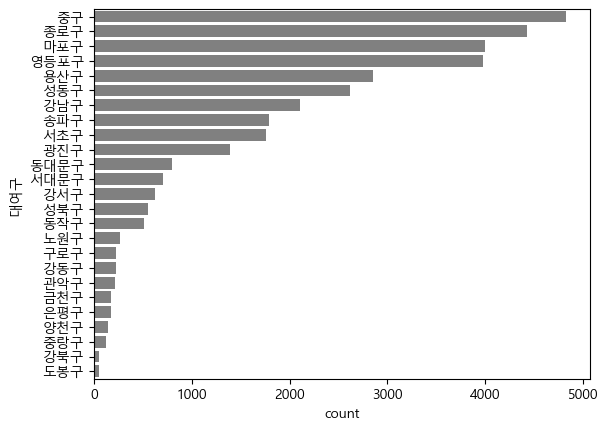

In [25]:
tmp = df1_out.groupby('대여구')['대여구'].value_counts().reset_index().sort_values(by='count', ascending=False)
sns.barplot(data=tmp, y='대여구', x='count', color='gray')

<Axes: xlabel='count', ylabel='반납구'>

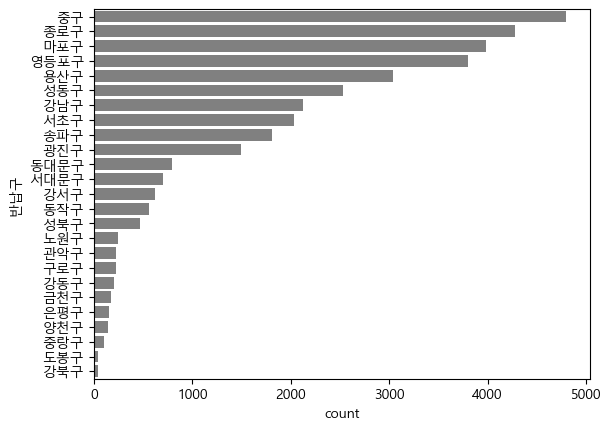

In [27]:
tmp2 = df1_out.groupby('반납구')['반납구'].value_counts().reset_index().sort_values(by='count', ascending=False)
sns.barplot(data=tmp2, y='반납구', x='count', color='gray')

#### (5) 대여구, 반납구 전처리

In [5]:
# 대여구의 강남구와 반납구의 강남구가 동일한 숫자로 라벨링 되도록 학습
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 생성 및 학습
le = LabelEncoder()
combined_values = pd.concat([df1_out['대여구'], df1_out['반납구']])
le.fit(combined_values)

# 대여구와 반납구 컬럼 변환
df1_out['대여구_e'] = le.transform(df1_out['대여구'])
df1_out['반납구_e'] = le.transform(df1_out['반납구'])

In [6]:
df1_out.head(1)

이용시간(분)  이용거리(M) 대여대여소ID 반납대여소ID        대여날짜        반납날짜  대여시간  반납시간  대여일자  \
0        6  1291.15   ST-36  ST-219  2023-12-01  2023-12-01    24    24     1   

     대여요일  대여월      대여위도       대여경도   대여구      반납위도       반납경도   반납구  대여구_e  \
0  Friday   12  37.55789  126.93808  서대문구  37.56626  126.94667  서대문구     13   

   반납구_e  
0     13

- null값 제거

In [7]:
df1_out = df1_out.dropna(subset=['대여구', '반납구', '대여구_e', '반납구_e'])

- 각 구에 부여된 label 확인

In [32]:
# 각 구에 어떤 lebel이 붙었는지 확인
df1_out[['대여구', '대여구_e']].drop_duplicates().sort_values(by='대여구_e')

대여구  대여구_e
67     강남구      0
38     강동구      1
1265   강북구      2
110    강서구      3
34     관악구      4
20     광진구      5
186    구로구      6
2107   금천구      7
11     노원구      8
1476   도봉구      9
1     동대문구     10
149    동작구     11
45     마포구     12
0     서대문구     13
15     서초구     14
46     성동구     15
10     성북구     16
8      송파구     17
83     양천구     18
4     영등포구     19
7      용산구     20
890    은평구     21
3      종로구     22
2       중구     23
350    중랑구     24

- 대여구, 반납구 컬럼은 지우기

In [8]:
df1_out = df1_out.drop(columns=['대여구', '반납구'])

In [9]:
df1_out.head(1)

이용시간(분)  이용거리(M) 대여대여소ID 반납대여소ID        대여날짜        반납날짜  대여시간  반납시간  대여일자  \
0        6  1291.15   ST-36  ST-219  2023-12-01  2023-12-01    24    24     1   

     대여요일  대여월      대여위도       대여경도      반납위도       반납경도  대여구_e  반납구_e  
0  Friday   12  37.55789  126.93808  37.56626  126.94667     13     13

### 2. 특성 추출

일 평균 방문 고객 수   
주말-주중 일평균 방문고객 비율  
점심시간 이후 방문고객 비율  
새벽 방문고객 비율   
주중 출근시간대 방문고객 비율
주중 퇴근시간대 방문고객 비율  
주중 해당 대여구 고객 비율  
주말 해당 대여구 고객 비율
주중 해당 반납구 고객 비율  
주말 해당 반납구 고객 비율
특정 시간대의 대여 횟수  
특정 요일의 대여 횟수  
평균 이동거리
평균 이동시간  
주중 평균 체류시간 대비 야간 체류시간 비  
주말 평균 체류시간 대비 야간 체류시간 비  

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df1_out['대여일자'] = pd.to_datetime(df1_out['대여일자'])

# 주중/주말 구분
df1_out['주말여부'] = df1_out['대여요일'].isin(['Saturday', 'Sunday'])

# 시간대 구분
df1_out['새벽시간'] = (df1_out['대여시간'] >= 0) & (df1_out['대여시간'] < 6)
df1_out['오전시간'] = (df1_out['대여시간'] >= 7) & (df1_out['대여시간'] < 10)
df1_out['점심시간'] = (df1_out['대여시간'] >= 10) & (df1_out['대여시간'] < 14)
df1_out['오후시간'] = (df1_out['대여시간'] >= 14) & (df1_out['대여시간'] < 18)
df1_out['저녁시간'] = (df1_out['대여시간'] >= 19) & (df1_out['대여시간'] < 22)
df1_out['야간시간'] = (df1_out['대여시간'] >= 22) & (df1_out['대여시간'] < 24)

# 대여대여소ID 기준 그룹화하여 통계 피처 생성
grouped = df1_out.groupby('대여대여소ID').agg({
    '대여일자': 'count',  # 총 대여 횟수
    '이용시간(분)': 'mean',  # 평균 이용시간
    '이용거리(M)' : 'mean', # 평균 이용거리
    '주말여부': 'mean',  # 주말 대여 비율
    '오전시간': 'mean',  # 오전시간 대여 비율
    '점심시간': 'mean',  # 점심시간 대여 비율
    '오후시간': 'mean', # 오후시간 대여 비율
    '새벽시간': 'mean',  # 새벽 대여 비율
    '저녁시간': 'mean',  # 퇴근 시간대 대여 비율
    '야간시간': 'mean'  # 야간 대여 비율
}).reset_index()

# 컬럼 이름 변경
grouped.columns = [
    '대여대여소ID', '총대여횟수', '평균이용시간', '평균이용거리',
    '주말대여비율', '오전대여비율', '점심대여비율', '오후대여비율',
    '새벽대여비율', '저녁대여비율', '야간대여비율'
]

print(grouped)

      대여대여소ID  총대여횟수     평균이용시간       평균이용거리    주말대여비율    오전대여비율    점심대여비율  \
0       ST-10    122  79.131148  5754.217869  0.336066  0.032787  0.245902   
1     ST-1002      2  22.500000  3910.000000  0.000000  1.000000  0.000000   
2     ST-1005      1  37.000000  3207.220000  1.000000  0.000000  0.000000   
3     ST-1006      2  59.000000  1822.870000  1.000000  0.000000  0.000000   
4     ST-1010      9   9.222222  1381.175556  0.222222  0.000000  0.555556   
...       ...    ...        ...          ...       ...       ...       ...   
1838   ST-991      1  41.000000  5870.390000  0.000000  0.000000  0.000000   
1839   ST-992     10  25.300000  3244.275000  0.300000  0.000000  0.200000   
1840   ST-993      1  13.000000  1360.000000  0.000000  0.000000  0.000000   
1841   ST-994      2  14.000000  1760.000000  0.000000  0.000000  0.000000   
1842   ST-996      1  11.000000  1280.240000  1.000000  0.000000  0.000000   

        오후대여비율   새벽대여비율    저녁대여비율    야간대여비율  
0     0.344262  0

In [ ]:
# grouped 이용시간 표준편차, 이용거리 표준편차 null값 0으로 채우기
grouped['이용시간표준편차'] = grouped['이용시간표준편차'].fillna(0)
grouped['이용거리표준편차'] = grouped['이용거리표준편차'].fillna(0)

In [38]:
grouped.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1843 entries, 0 to 1842
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   대여대여소ID   1843 non-null   object 
 1   총대여횟수     1843 non-null   int64  
 2   평균이용시간    1843 non-null   float64
 3   이용시간표준편차  1843 non-null   float64
 4   평균이용거리    1843 non-null   float64
 5   이용거리표준편차  1843 non-null   float64
 6   주말대여비율    1843 non-null   float64
 7   점심시간대여비율  1843 non-null   float64
 8   새벽대여비율    1843 non-null   float64
 9   출근시간대여비율  1843 non-null   float64
 10  퇴근시간대여비율  1843 non-null   float64
 11  야간대여비율    1843 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 172.9+ KB


### 3. k-means 군집분석

##### (1) 최적의 k 찾기

- Elbow Method

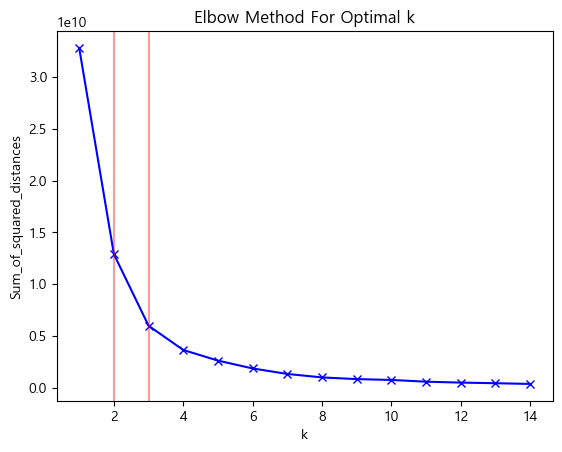

In [12]:
from sklearn.cluster import KMeans

# 군집분석에 사용할 피처 선택
features = grouped.drop(columns=['대여대여소ID'])

sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(features)
    sum_of_squared_distances.append(km.inertia_)
    
# 시각화

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.axvline(2,c= 'r',alpha =0.4)
plt.axvline(3,c= 'r',alpha =0.4)
plt.show()

> 2~3개가 최적으로 보임

- silhouette_score(실루엣점수)  
: 각 군집간의 거리가 얼마나 효율적으로 분리되어 있는지 (효율적으로 잘 분리 = 다른 군집과의 거리는 멀고, 동일 군집과의 데이터는 서로 가까운 것)  
: [-1, 1] 1에 가까울수록 좋음 (= 근처 군집과 멀리 떨어져 있다는 의미), 0에 가까울수록 근처 군집과 가까움

In [13]:
from sklearn.metrics import silhouette_score
k_range = range(2,14)

best_n = -1
best_silhouette_score = -1

for k in k_range:

  kmeans = KMeans(n_clusters=k, random_state=200)
  kmeans.fit(features)
  clusters = kmeans.predict(features)

  score = silhouette_score(features, clusters)
  print('k :',  k, 'score :', score)

  if score > best_silhouette_score:
    best_n = k
    best_silhouette_score = score

print('best n :', best_n, 'best score :', best_silhouette_score )

k : 2 score : 0.7021455522337939
k : 3 score : 0.5898948412013755
k : 4 score : 0.5785144285546303
k : 5 score : 0.5586525199221611
k : 6 score : 0.5331808532721656
k : 7 score : 0.535029791158913
k : 8 score : 0.5376623480468821
k : 9 score : 0.5346895245835437
k : 10 score : 0.522847910792645
k : 11 score : 0.5225641622925354
k : 12 score : 0.5258821744475276
k : 13 score : 0.5179064928290729
best n : 2 best score : 0.7021455522337939


#### (2) k-means 군집분석

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 군집분석에 사용할 피처 선택
features = grouped.drop(columns=['대여대여소ID'])

# 표준화
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# K-means 군집분석
kmeans = KMeans(n_clusters=4, random_state=42)
grouped['군집'] = kmeans.fit_predict(scaled_features)

# PCA 적용
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# PCA 결과를 데이터프레임에 추가
grouped['PCA1'] = pca_features[:, 0]
grouped['PCA2'] = pca_features[:, 1]

# 결과 출력
print(grouped)

      대여대여소ID  총대여횟수     평균이용시간       평균이용거리    주말대여비율    오전대여비율    점심대여비율  \
0       ST-10    122  79.131148  5754.217869  0.336066  0.032787  0.245902   
1     ST-1002      2  22.500000  3910.000000  0.000000  1.000000  0.000000   
2     ST-1005      1  37.000000  3207.220000  1.000000  0.000000  0.000000   
3     ST-1006      2  59.000000  1822.870000  1.000000  0.000000  0.000000   
4     ST-1010      9   9.222222  1381.175556  0.222222  0.000000  0.555556   
...       ...    ...        ...          ...       ...       ...       ...   
1838   ST-991      1  41.000000  5870.390000  0.000000  0.000000  0.000000   
1839   ST-992     10  25.300000  3244.275000  0.300000  0.000000  0.200000   
1840   ST-993      1  13.000000  1360.000000  0.000000  0.000000  0.000000   
1841   ST-994      2  14.000000  1760.000000  0.000000  0.000000  0.000000   
1842   ST-996      1  11.000000  1280.240000  1.000000  0.000000  0.000000   

        오후대여비율   새벽대여비율    저녁대여비율    야간대여비율  군집      PCA1      

- k=2,3,4 일 때의 군집화

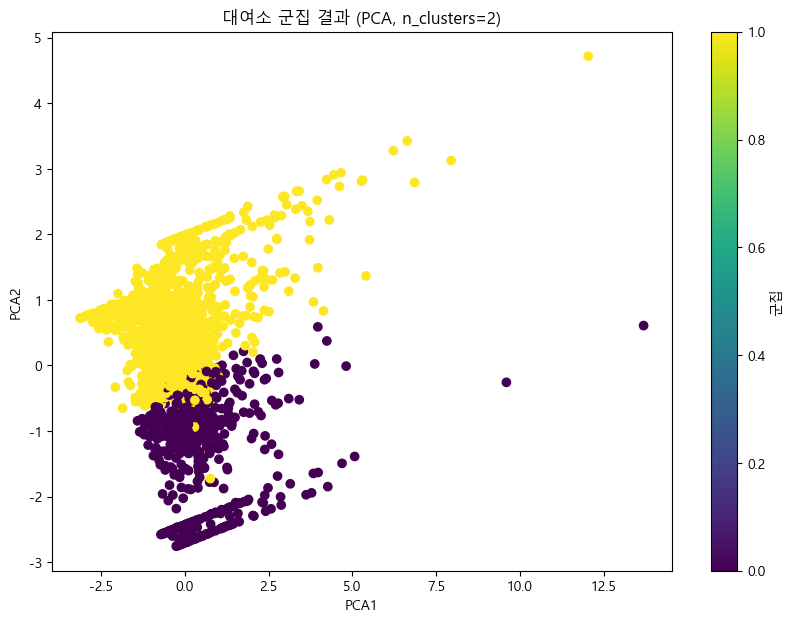

n_clusters = 2일 때 각 군집의 평균 값:


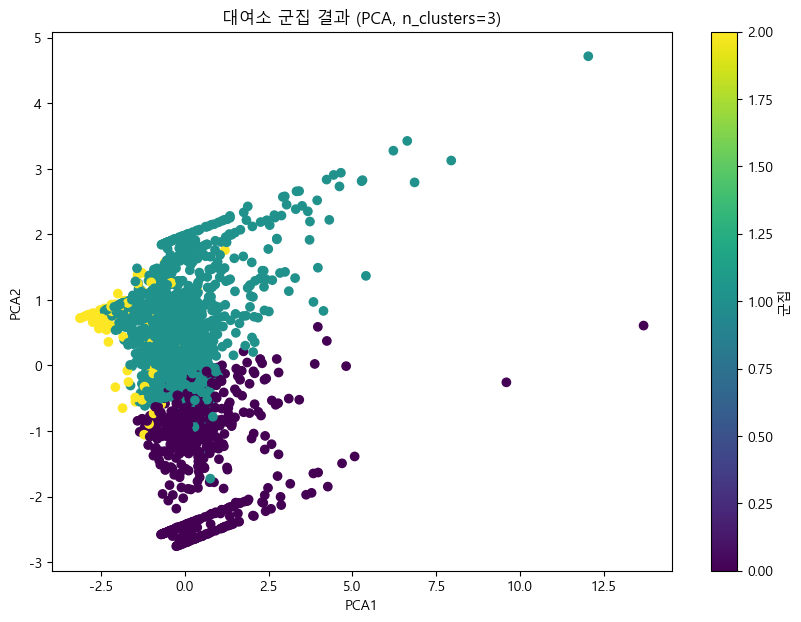

n_clusters = 3일 때 각 군집의 평균 값:


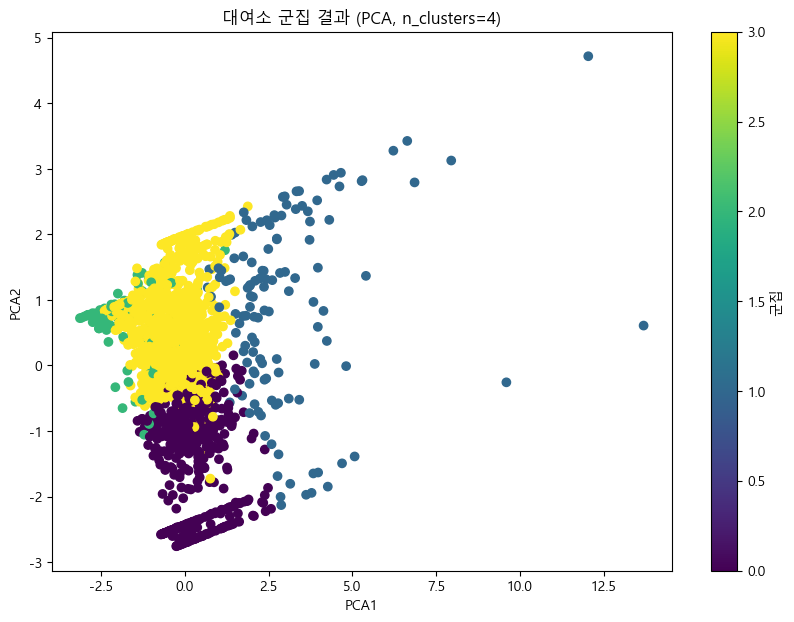

n_clusters = 4일 때 각 군집의 평균 값:


n_clusters = 2일 때 각 대여소가 속한 군집:
      대여대여소ID  군집
0       ST-10   1
1     ST-1002   1
2     ST-1005   0
3     ST-1006   0
4     ST-1010   1
...       ...  ..
1838   ST-991   0
1839   ST-992   1
1840   ST-993   0
1841   ST-994   1
1842   ST-996   0

[1843 rows x 2 columns]
n_clusters = 3일 때 각 대여소가 속한 군집:
      대여대여소ID  군집
0       ST-10   1
1     ST-1002   1
2     ST-1005   0
3     ST-1006   0
4     ST-1010   1
...       ...  ..
1838   ST-991   0
1839   ST-992   1
1840   ST-993   0
1841   ST-994   1
1842   ST-996   0

[1843 rows x 2 columns]
n_clusters = 4일 때 각 대여소가 속한 군집:
      대여대여소ID  군집
0       ST-10   3
1     ST-1002   3
2     ST-1005   0
3     ST-1006   0
4     ST-1010   3
...       ...  ..
1838   ST-991   0
1839   ST-992   3
1840   ST-993   0
1841   ST-994   3
1842   ST-996   0

[1843 rows x 2 columns]


In [15]:
# 변수 초기화
cluster_results = {}

# n_clusters 값을 2, 3, 4로 설정하여 K-means 군집분석 및 시각화
for n_clusters in [2, 3, 4]:
    # K-means 군집분석
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    grouped['군집'] = kmeans.fit_predict(scaled_features)

    # PCA 적용
    pca = PCA(n_components=2)
    pca_features = pca.fit_transform(scaled_features)

    # PCA 결과를 데이터프레임에 추가
    grouped['PCA1'] = pca_features[:, 0]
    grouped['PCA2'] = pca_features[:, 1]

    # 군집 시각화
    plt.figure(figsize=(10, 7))
    plt.scatter(grouped['PCA1'], grouped['PCA2'], c=grouped['군집'], cmap='viridis')
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    plt.title(f'대여소 군집 결과 (PCA, n_clusters={n_clusters})')
    plt.colorbar(label='군집')
    plt.show()
    
    # 각 군집의 평균 값 계산 (대여대여소ID 제외)
    grouped_means = grouped.drop(columns=['대여대여소ID', 'PCA1', 'PCA2']).groupby('군집').mean()

    # # 컬럼 별로 가장 높은 값을 가진 군집의 셀에 파란색 배경 추가
    # def highlight_max(s):
    #     is_max = s == s.max()
    #     return ['background-color: #ccffcc' if v else '' for v in is_max]

    # styled_means = grouped_means.style.apply(highlight_max)
    
    # 컬럼 별로 가장 높은 값을 가진 군집의 셀에 연한 초록색 배경 추가
    def highlight_max(s):
        is_max = s == s.max()
        return ['background-color: #ccffcc' if v else '' for v in is_max]

    # 컬럼 별로 가장 낮은 값을 가진 군집의 셀에 연한 노랑색 배경 추가
    def highlight_min(s):
        is_min = s == s.min()
        return ['background-color: #fffff0' if v else '' for v in is_min]

    styled_means = grouped_means.style.apply(highlight_max).apply(highlight_min)

    
    # 결과 출력
    print(f"n_clusters = {n_clusters}일 때 각 군집의 평균 값:")
    display(styled_means)
    
    # 각 대여소가 속한 군집 저장
    cluster_results[f'cluster_{n_clusters}'] = grouped[['대여대여소ID', '군집']].copy()

# 결과 데이터프레임 확인
df_out_2 = cluster_results['cluster_2']
df_out_3 = cluster_results['cluster_3']
df_out_4 = cluster_results['cluster_4']

print("n_clusters = 2일 때 각 대여소가 속한 군집:")
print(df_out_2)

print("n_clusters = 3일 때 각 대여소가 속한 군집:")
print(df_out_3)

print("n_clusters = 4일 때 각 대여소가 속한 군집:")
print(df_out_4)

### 4. DB Scan 군집분석

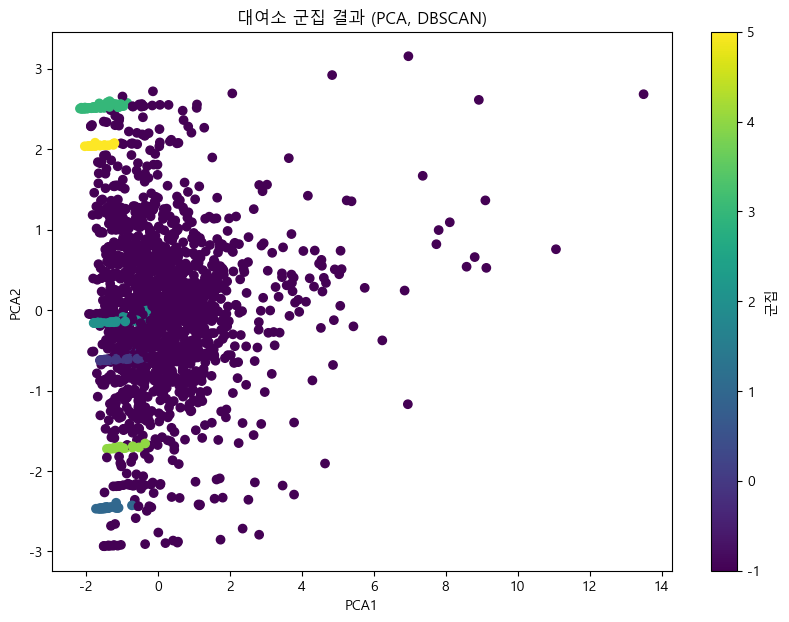

DBSCAN을 사용한 각 군집의 평균 값:


In [56]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 데이터 준비 및 전처리
df1_out['대여일자'] = pd.to_datetime(df1_out['대여일자'])

# 주중/주말 구분
df1_out['주말여부'] = df1_out['대여요일'].isin(['Saturday', 'Sunday'])

# 시간대 구분
df1_out['점심시간'] = (df1_out['대여시간'] >= 12) & (df1_out['대여시간'] < 14)
df1_out['새벽시간'] = (df1_out['대여시간'] >= 0) & (df1_out['대여시간'] < 6)
df1_out['출근시간'] = (df1_out['대여시간'] >= 7) & (df1_out['대여시간'] < 9)
df1_out['퇴근시간'] = (df1_out['대여시간'] >= 17) & (df1_out['대여시간'] < 19)
df1_out['야간시간'] = (df1_out['대여시간'] >= 19) & (df1_out['대여시간'] < 24)

# 대여대여소ID 기준 그룹화하여 통계 피처 생성
grouped = df1_out.groupby('대여대여소ID').agg({
    '대여일자': 'count',  # 총 대여 횟수
    '이용시간(분)': ['mean', 'std'],  # 평균 이용시간 및 표준편차
    '이용거리(M)': ['mean', 'std'],  # 평균 이용거리 및 표준편차
    '주말여부': 'mean',  # 주말 대여 비율
    '점심시간': 'mean',  # 점심시간 대여 비율
    '새벽시간': 'mean',  # 새벽 대여 비율
    '출근시간': 'mean',  # 출근 시간대 대여 비율
    '퇴근시간': 'mean',  # 퇴근 시간대 대여 비율
    '야간시간': 'mean'  # 야간 대여 비율
}).reset_index()

# 컬럼 이름 변경
grouped.columns = [
    '대여대여소ID', '총대여횟수', '평균이용시간', '이용시간표준편차',
    '평균이용거리', '이용거리표준편차', '주말대여비율', '점심시간대여비율',
    '새벽대여비율', '출근시간대여비율', '퇴근시간대여비율', '야간대여비율'
]

# null 값 제거
grouped = grouped.fillna(0)

# 군집분석에 사용할 피처 선택
features = grouped.drop(columns=['대여대여소ID'])

# 표준화
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# DBSCAN 군집분석 >> eps, min_samples 값 조정 필요!
dbscan = DBSCAN(eps=0.7, min_samples=20)
grouped['군집'] = dbscan.fit_predict(scaled_features)

# PCA 적용
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# PCA 결과를 데이터프레임에 추가
grouped['PCA1'] = pca_features[:, 0]
grouped['PCA2'] = pca_features[:, 1]

# 군집 시각화
plt.figure(figsize=(10, 7))
plt.scatter(grouped['PCA1'], grouped['PCA2'], c=grouped['군집'], cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('대여소 군집 결과 (PCA, DBSCAN)')
plt.colorbar(label='군집')
plt.show()

# 각 군집의 평균 값 계산 (대여대여소ID, PCA1, PCA2 제외)
grouped_means = grouped.drop(columns=['대여대여소ID', 'PCA1', 'PCA2']).groupby('군집').mean()

# 컬럼 별로 가장 높은 값을 가진 군집의 셀에 연한 초록색 배경 추가
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: #ccffcc' if v else '' for v in is_max]

styled_means = grouped_means.style.apply(highlight_max)

# 결과 출력
print("DBSCAN을 사용한 각 군집의 평균 값:")
display(styled_means)

### 5. k-means 보완
- 비율..이라고 해놓고 mean을 구해놓은 건에 대하여.. 새로고침

In [32]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df1_out['대여일자'] = pd.to_datetime(df1_out['대여일자'])

# 주중/주말 구분
df1_out['주말여부'] = df1_out['대여요일'].isin(['Saturday', 'Sunday'])

# 시간대 구분
df1_out['새벽시간'] = (df1_out['대여시간'] >= 0) & (df1_out['대여시간'] < 6)
df1_out['오전시간'] = (df1_out['대여시간'] >= 7) & (df1_out['대여시간'] < 10)
df1_out['점심시간'] = (df1_out['대여시간'] >= 10) & (df1_out['대여시간'] < 14)
df1_out['오후시간'] = (df1_out['대여시간'] >= 14) & (df1_out['대여시간'] < 18)
df1_out['저녁시간'] = (df1_out['대여시간'] >= 18) & (df1_out['대여시간'] < 22)
df1_out['야간시간'] = (df1_out['대여시간'] >= 22) & (df1_out['대여시간'] < 24)

# 대여대여소ID 기준 그룹화하여 통계 피처 생성
grouped = df1_out.groupby('대여대여소ID').agg({
    '대여일자': 'count',  # 총 대여 횟수
    '이용시간(분)': 'mean',  # 평균 이용시간
    '이용거리(M)' : 'mean', # 평균 이용거리
    '주말여부': lambda x: x.sum() / x.count(),  # 주말 대여 비율
    '새벽시간': lambda x: x.sum() / x.count(),  # 새벽 대여 비율
    '오전시간': lambda x: x.sum() / x.count(),  # 오전시간 대여 비율
    '점심시간': lambda x: x.sum() / x.count(),  # 점심시간 대여 비율
    '오후시간': lambda x: x.sum() / x.count(),  # 오후시간 대여 비율
    '저녁시간': lambda x: x.sum() / x.count(),  # 퇴근 시간대 대여 비율
    '야간시간': lambda x: x.sum() / x.count()   # 야간 대여 비율
}).reset_index()

# 컬럼 이름 변경
grouped.columns = [
    '대여대여소ID', '총대여횟수', '평균이용시간', '평균이용거리',
    '주말대여비율', '새벽대여비율', '오전대여비율', '점심대여비율', '오후대여비율',
    '저녁대여비율', '야간대여비율'
]

print(grouped)

      대여대여소ID  총대여횟수     평균이용시간       평균이용거리    주말대여비율   새벽대여비율    오전대여비율  \
0       ST-10    122  79.131148  5754.217869  0.336066  0.04918  0.032787   
1     ST-1002      2  22.500000  3910.000000  0.000000  0.00000  1.000000   
2     ST-1005      1  37.000000  3207.220000  1.000000  0.00000  0.000000   
3     ST-1006      2  59.000000  1822.870000  1.000000  0.00000  0.000000   
4     ST-1010      9   9.222222  1381.175556  0.222222  0.00000  0.000000   
...       ...    ...        ...          ...       ...      ...       ...   
1838   ST-991      1  41.000000  5870.390000  0.000000  0.00000  0.000000   
1839   ST-992     10  25.300000  3244.275000  0.300000  0.20000  0.000000   
1840   ST-993      1  13.000000  1360.000000  0.000000  0.00000  0.000000   
1841   ST-994      2  14.000000  1760.000000  0.000000  0.00000  0.000000   
1842   ST-996      1  11.000000  1280.240000  1.000000  0.00000  0.000000   

        점심대여비율    오후대여비율    저녁대여비율    야간대여비율  
0     0.245902  0.344262  0.

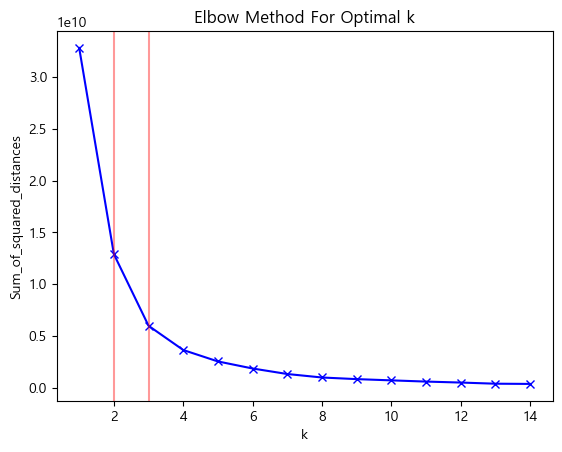

In [33]:
from sklearn.cluster import KMeans

# 군집분석에 사용할 피처 선택
features = grouped.drop(columns=['대여대여소ID'])

sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(features)
    sum_of_squared_distances.append(km.inertia_)
    
# 시각화

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.axvline(2,c= 'r',alpha =0.4)
plt.axvline(3,c= 'r',alpha =0.4)
plt.show()

In [34]:
from sklearn.metrics import silhouette_score
k_range = range(2,14)

best_n = -1
best_silhouette_score = -1

for k in k_range:

  kmeans = KMeans(n_clusters=k, random_state=200)
  kmeans.fit(features)
  clusters = kmeans.predict(features)

  score = silhouette_score(features, clusters)
  print('k :',  k, 'score :', score)

  if score > best_silhouette_score:
    best_n = k
    best_silhouette_score = score

print('best n :', best_n, 'best score :', best_silhouette_score )

k : 2 score : 0.7021455505846309
k : 3 score : 0.5898948354135013
k : 4 score : 0.5785144202753115
k : 5 score : 0.5586525086004476
k : 6 score : 0.5331808325690884
k : 7 score : 0.535029768724388
k : 8 score : 0.5376623167040239
k : 9 score : 0.5346894929728859
k : 10 score : 0.5228478615790602
k : 11 score : 0.5225641130381654
k : 12 score : 0.5258821143667881
k : 13 score : 0.5179064213131632
best n : 2 best score : 0.7021455505846309


In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 군집분석에 사용할 피처 선택
features = grouped.drop(columns=['대여대여소ID'])

# 표준화
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# K-means 군집분석
kmeans = KMeans(n_clusters=4, random_state=42)
grouped['군집'] = kmeans.fit_predict(scaled_features)

# PCA 적용
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# PCA 결과를 데이터프레임에 추가
grouped['PCA1'] = pca_features[:, 0]
grouped['PCA2'] = pca_features[:, 1]

# 결과 출력
print(grouped)

      대여대여소ID  총대여횟수     평균이용시간       평균이용거리    주말대여비율   새벽대여비율    오전대여비율  \
0       ST-10    122  79.131148  5754.217869  0.336066  0.04918  0.032787   
1     ST-1002      2  22.500000  3910.000000  0.000000  0.00000  1.000000   
2     ST-1005      1  37.000000  3207.220000  1.000000  0.00000  0.000000   
3     ST-1006      2  59.000000  1822.870000  1.000000  0.00000  0.000000   
4     ST-1010      9   9.222222  1381.175556  0.222222  0.00000  0.000000   
...       ...    ...        ...          ...       ...      ...       ...   
1838   ST-991      1  41.000000  5870.390000  0.000000  0.00000  0.000000   
1839   ST-992     10  25.300000  3244.275000  0.300000  0.20000  0.000000   
1840   ST-993      1  13.000000  1360.000000  0.000000  0.00000  0.000000   
1841   ST-994      2  14.000000  1760.000000  0.000000  0.00000  0.000000   
1842   ST-996      1  11.000000  1280.240000  1.000000  0.00000  0.000000   

        점심대여비율    오후대여비율    저녁대여비율    야간대여비율  군집      PCA1      PCA2  
0   

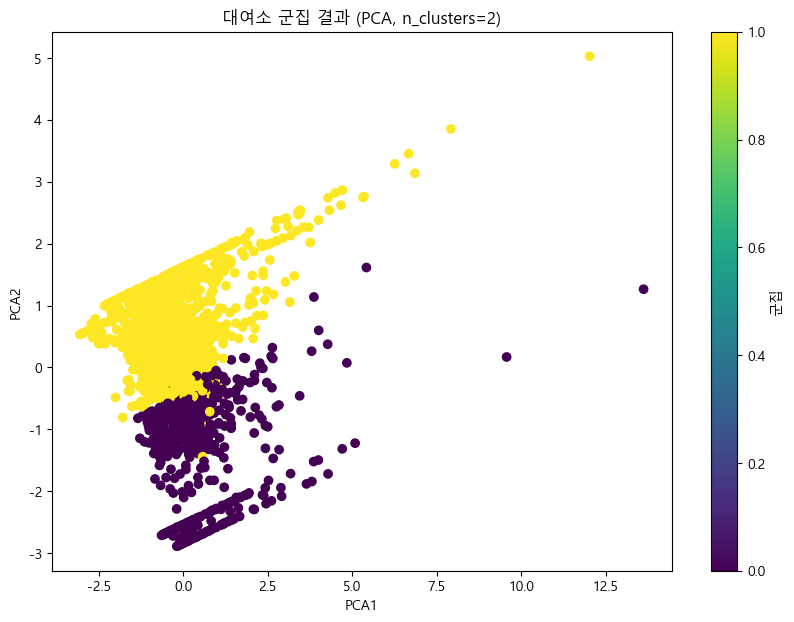

n_clusters = 2일 때 각 군집의 평균 값:


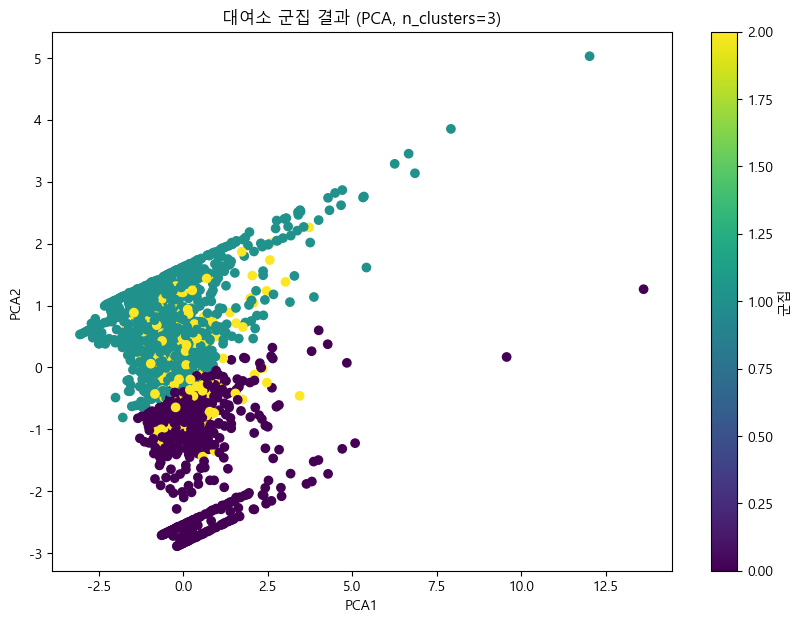

n_clusters = 3일 때 각 군집의 평균 값:


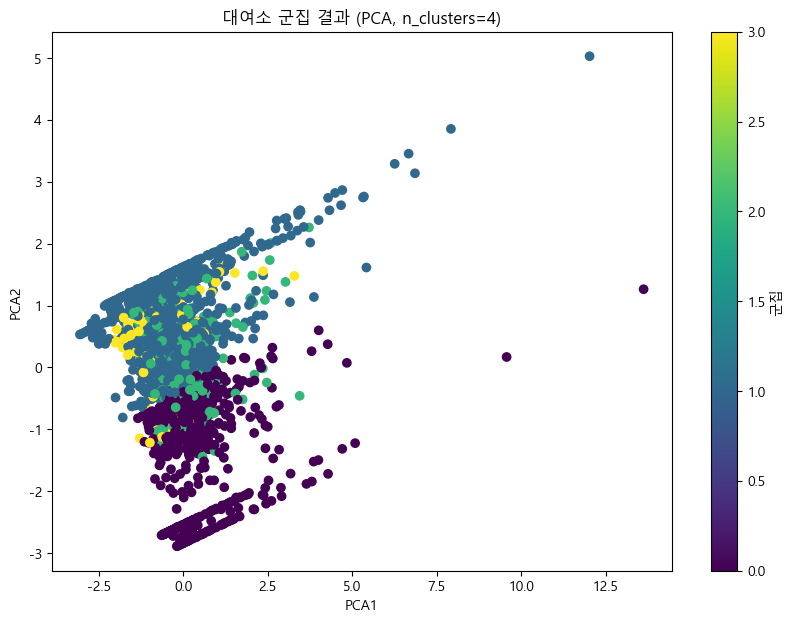

n_clusters = 4일 때 각 군집의 평균 값:


n_clusters = 2일 때 각 대여소가 속한 군집:
      대여대여소ID  군집
0       ST-10   1
1     ST-1002   1
2     ST-1005   0
3     ST-1006   0
4     ST-1010   1
...       ...  ..
1838   ST-991   0
1839   ST-992   1
1840   ST-993   0
1841   ST-994   1
1842   ST-996   0

[1843 rows x 2 columns]
n_clusters = 3일 때 각 대여소가 속한 군집:
      대여대여소ID  군집
0       ST-10   2
1     ST-1002   2
2     ST-1005   0
3     ST-1006   0
4     ST-1010   1
...       ...  ..
1838   ST-991   0
1839   ST-992   1
1840   ST-993   0
1841   ST-994   1
1842   ST-996   0

[1843 rows x 2 columns]
n_clusters = 4일 때 각 대여소가 속한 군집:
      대여대여소ID  군집
0       ST-10   2
1     ST-1002   2
2     ST-1005   0
3     ST-1006   0
4     ST-1010   1
...       ...  ..
1838   ST-991   0
1839   ST-992   1
1840   ST-993   0
1841   ST-994   1
1842   ST-996   0

[1843 rows x 2 columns]


In [36]:
# 변수 초기화
cluster_results = {}

# n_clusters 값을 2, 3, 4로 설정하여 K-means 군집분석 및 시각화
for n_clusters in [2, 3, 4]:
    # K-means 군집분석
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    grouped['군집'] = kmeans.fit_predict(scaled_features)

    # PCA 적용
    pca = PCA(n_components=2)
    pca_features = pca.fit_transform(scaled_features)

    # PCA 결과를 데이터프레임에 추가
    grouped['PCA1'] = pca_features[:, 0]
    grouped['PCA2'] = pca_features[:, 1]

    # 군집 시각화
    plt.figure(figsize=(10, 7))
    plt.scatter(grouped['PCA1'], grouped['PCA2'], c=grouped['군집'], cmap='viridis')
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    plt.title(f'대여소 군집 결과 (PCA, n_clusters={n_clusters})')
    plt.colorbar(label='군집')
    plt.show()
    
    # 각 군집의 평균 값 계산 (대여대여소ID 제외)
    grouped_means = grouped.drop(columns=['대여대여소ID', 'PCA1', 'PCA2']).groupby('군집').mean()

    # # 컬럼 별로 가장 높은 값을 가진 군집의 셀에 파란색 배경 추가
    # def highlight_max(s):
    #     is_max = s == s.max()
    #     return ['background-color: #ccffcc' if v else '' for v in is_max]

    # styled_means = grouped_means.style.apply(highlight_max)
    
    # 컬럼 별로 가장 높은 값을 가진 군집의 셀에 연한 초록색 배경 추가
    def highlight_max(s):
        is_max = s == s.max()
        return ['background-color: #ccffcc' if v else '' for v in is_max]

    # 컬럼 별로 가장 낮은 값을 가진 군집의 셀에 연한 노랑색 배경 추가
    def highlight_min(s):
        is_min = s == s.min()
        return ['background-color: #fffff0' if v else '' for v in is_min]

    styled_means = grouped_means.style.apply(highlight_max).apply(highlight_min)

    
    # 결과 출력
    print(f"n_clusters = {n_clusters}일 때 각 군집의 평균 값:")
    display(styled_means)
    
    # 각 대여소가 속한 군집 저장
    cluster_results[f'cluster_{n_clusters}'] = grouped[['대여대여소ID', '군집']].copy()

# 결과 데이터프레임 확인
df_out_2 = cluster_results['cluster_2']
df_out_3 = cluster_results['cluster_3']
df_out_4 = cluster_results['cluster_4']

print("n_clusters = 2일 때 각 대여소가 속한 군집:")
print(df_out_2)

print("n_clusters = 3일 때 각 대여소가 속한 군집:")
print(df_out_3)

print("n_clusters = 4일 때 각 대여소가 속한 군집:")
print(df_out_4)

In [37]:
ll_join = pd.read_csv('./서울시 따릉이대여소 마스터 정보(전처리).csv')
ll_join.head(1)

대여소_ID       위도        경도    구
0  ST-999  37.5334  126.8765  양천구

In [38]:
out_k_2 = pd.merge(df_out_2, ll_join, how='left', left_on='대여대여소ID', right_on='대여소_ID')
out_k_2 = out_k_2.drop(columns=['대여소_ID'])
out_k_2.columns = ['대여소ID', '군집', '위도', '경도', '구']
out_k_2.head()

대여소ID  군집        위도         경도    구
0    ST-10   1  37.55275  126.91862  마포구
1  ST-1002   1  37.52990  126.87654  양천구
2  ST-1005   0  37.51395  126.85606  양천구
3  ST-1006   0  37.53638  126.87151  양천구
4  ST-1010   1  37.53620  126.82780  양천구

In [39]:
out_k_2.to_csv('./(군집_외국인_k=2) 서울시 따릉이 대여소 별 군집결과_마스터 조인.csv', index=False)